In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv(r"C:\Users\91949")
print(df.head())

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\91949'

In [ ]:
df = pd.read_csv(r"C:\Users\91949\OneDrive\Desktop")
print(df.head())

In [ ]:
df = pd.read_csv(r"C:\Users\91949\OneDrive\Desktop\house price.csv")
print(df.head())

In [ ]:
df = pd.read_csv(r"C:\Users\91949\OneDrive\house_data.csv")
print(df.head())

In [ ]:
df = pd.read_csv(r"C:\Users\91949\OneDrive\Desktop\house_data.csv")
print(df.head())


In [4]:
X = df[['Area', 'Bedrooms']]   # Input
y = df['Price']               # Output


NameError: name 'df' is not defined

In [5]:
import pandas as pd


In [6]:
X = df[['Area', 'Bedrooms']]   
y = df['Price']     

NameError: name 'df' is not defined

In [7]:
df = pd.read_csv(r"C:\Users\91949\OneDrive\Desktop\house_data.csv")
print(df.head())


                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [8]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
        'floors', 'waterfront', 'view', 'condition',
        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]

y = df['price']


In [9]:
print(X)

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0          3.0       1.50         1340      7912     1.5           0     0   
1          5.0       2.50         3650      9050     2.0           0     4   
2          3.0       2.00         1930     11947     1.0           0     0   
3          3.0       2.25         2000      8030     1.0           0     0   
4          4.0       2.50         1940     10500     1.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4595       3.0       1.75         1510      6360     1.0           0     0   
4596       3.0       2.50         1460      7573     2.0           0     0   
4597       3.0       2.50         3010      7014     2.0           0     0   
4598       4.0       2.00         2090      6630     1.0           0     0   
4599       3.0       2.50         1490      8102     2.0           0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renova

In [10]:
print(y)

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
print(X_train.shape)


(3680, 12)


In [15]:
print(y_train.head)

<bound method NDFrame.head of 1898    6.850000e+05
1370    8.570000e+05
3038    6.750000e+05
2361    1.485000e+06
156     5.610000e+05
            ...     
4426    2.825089e+05
466     8.750000e+05
3092    2.900000e+05
3772    6.000000e+05
860     4.750000e+05
Name: price, Length: 3680, dtype: float64>


In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred = model.predict(X_test)
print(y_pred[:5])


[ 304863.38578074  326517.06991511 1071762.53630098  546241.40097357
  379799.9832109 ]


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
model.fit(X_train, y_train)

scores = cross_val_score(model, X, y, cv=5)
print("cross validation scores:", scores)
print("average accuracy:", scores.mean())

cross validation scores: [0.59766724 0.57065933 0.60284573 0.58222546 0.01458975]
average accuracy: 0.47359750291394376


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 986921767056.1176
R2 Score: 0.032283856632784325


In [27]:
from sklearn.metrics import r2_score

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print("Train R2:", train_r2)
print("Test R2:", test_r2)
# weak model and overfitting

Train R2: 0.544185359314763
Test R2: 0.032283856632784325


In [31]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [41]:
#or
from sklearn.linear_model import Lasso

model = Lasso( max_iter=50000)
model.fit(X_train, y_train)


,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,50000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [42]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(max_iter=50000)


In [43]:
print(X_train.min(), X_train.max())


-3.7318231079316706 29.80269336050962


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Lasso(alpha=0.1, max_iter=10000))
])

pipe.fit(X_train, y_train)

print("Train R2:", pipe.score(X_train, y_train))
print("Test R2:", pipe.score(X_test, y_test))


Train R2: 0.5441853593131891
Test R2: 0.032283808271508674


C:\Users\91949\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e+13, tolerance: 5.229e+10
  model = cd_fast.enet_coordinate_descent(


In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("CV R2:", scores.mean())


CV R2: 0.47361718898906136


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True)
plt.show()
#This means your dataset has a date or string column, and df.corr() works only with numeric columns.

So Pandas tried to convert a date string to float → failed.

ValueError: could not convert string to float: '2014-05-02 00:00:00'

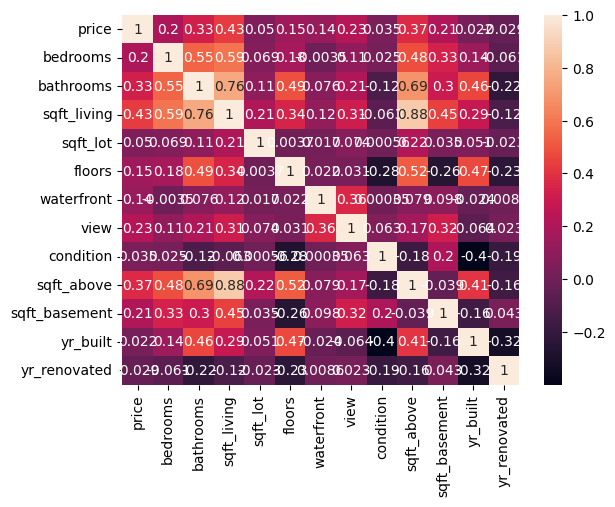

In [30]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()


In [45]:
new_house = [[3, 2, 2000, 8000,
              1, 0, 0, 3,
              2000, 0, 2005, 0]]

predicted_price = model.predict(new_house)
print("Predicted House Price:", predicted_price[0])


NotFittedError: This ElasticNet instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000))
])

pipe.fit(X_train, y_train)

predicted_price = pipe.predict(new_house)
print("Predicted House Price:", predicted_price[0])


Predicted House Price: 216360336.72747847


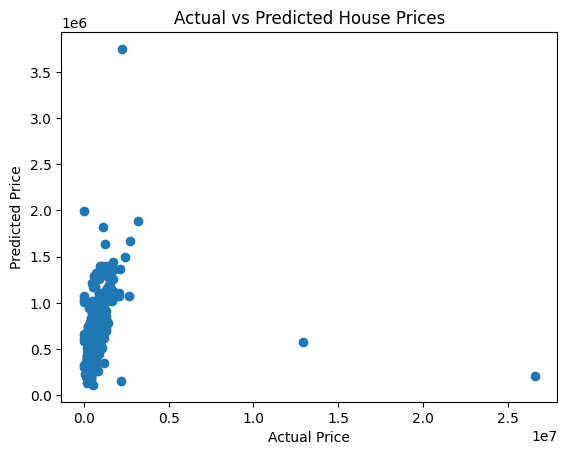

In [47]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()
